Outline
- Cover
- Speaker
- Overview
- What is Qiskit Runtime
    - Why do we want to use Qiskit Runtime?
- Getting started with Qiskit Runtime
    - Installation
    - Get access credentials
    - Run "hello world" program
- Primitives
    - Why do we want to change to primitives model?
    - What are the primitives?
        - Sampler
        - Estimator
    - Demo
        - Grover with sampler
        - VQE with estimator
            - Qiskit Nature and other modules will be refactored

# Qiskit Runtime talk

By Junye Huang, Quantum Developer Advocate

Date: May 24, 2022

# About the speaker

Junye Huang is a Quantum Developer Advocate focusing on quantum education.

# Outline

- What is Qiskit Runtime
- Getting started with Qiskit Runtime
- Qiskit Primitives

# What is Qiskit Runtime

Qiskit Runtime is a new programming model, bring quantum closer to classical to speed up hybrid workflow


## Why do we want  to use Qiskit Runtime?

Qiskit Runtime can speed up hybrid workflow

# Getting started with Qiskit Runtime

# Installation

```bash
pip install qiskit
pip install qiskit-ibm-runtime
```

# Find your access credentials

You can access Qiskit Runtime from either IBM Quantum or IBM Cloud.

## IBM Quantum

Retrieve IBM Quantum token here: https://quantum-computing.ibm.com/account

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService

QiskitRuntimeService.save_account(channel="ibm_quantum", token="MY_IBM_QUANTUM_TOKEN")

## IBM Cloud

Retrieve IBM Cloud token here: https://cloud.ibm.com/docs/quantum-computing?topic=quantum-computing-quickstart

In [ ]:
QiskitRuntimeService.save_account(channel="ibm_cloud", 
                                  token="MY_IBM_CLOUD_API_KEY", 
                                  instance="MY_IBM_CLOUD_CRN")

# Run "Hello World" program

In [1]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService()
program_inputs = {'iterations': 1}
options = {"backend_name": "ibmq_qasm_simulator"}
job = service.run(program_id="hello-world",
                  options=options,
                  inputs=program_inputs
                 )
print(f"job id: {job.job_id}")
result = job.result()
print(result)

job id: ca5lvql9epflseke5bl0
Hello, World!


# Qiskit Primitives

What are they and why do we need them?

# Sampler primitive

# Estimator primitive

# More primitives in the roadmap

- Integrator
- Discriminator

# How to use Sampler primitive

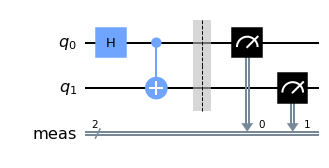

In [2]:
from qiskit import QuantumCircuit

bell = QuantumCircuit(2)
bell.h(0)
bell.cx(0, 1)
bell.measure_all()
bell.draw()

In [3]:
from qiskit_ibm_runtime import Sampler

with Sampler(circuits=bell, service=service, options={"backend": "ibmq_qasm_simulator"}) as sampler:
    result = sampler(circuit_indices=[0], shots=1024)
    print(result)

SamplerResult(quasi_dists=[{'00': 0.486328125, '11': 0.513671875}], metadata=[{'header_metadata': {}, 'shots': 1024}])


## Running mutiple circuits

In [4]:
with Sampler(circuits=[bell]*3, service=service, options={"backend": "ibmq_qasm_simulator"}) as sampler:
    result = sampler(circuit_indices=[0, 1, 2], shots=2048)
    print(result)

SamplerResult(quasi_dists=[{'11': 0.49560546875, '00': 0.50439453125}, {'11': 0.4970703125, '00': 0.5029296875}, {'00': 0.48046875, '11': 0.51953125}], metadata=[{'header_metadata': {}, 'shots': 2048}, {'header_metadata': {}, 'shots': 2048}, {'header_metadata': {}, 'shots': 2048}])


# Running parameterized circuits

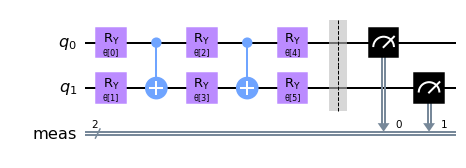

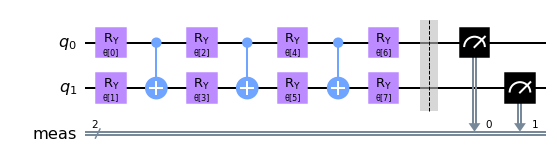

In [5]:
from qiskit.circuit.library import RealAmplitudes
from IPython.display import display

# parameterized circuit
pqc = RealAmplitudes(num_qubits=2, reps=2)
pqc.measure_all()
pqc2 = RealAmplitudes(num_qubits=2, reps=3)
pqc2.measure_all()

display(pqc.decompose().draw())
display(pqc2.decompose().draw())

In [6]:
theta1 = [0, 1, 1, 2, 3, 5]
theta2 = [1, 2, 3, 4, 5, 6]
theta3 = [0, 1, 2, 3, 4, 5, 6, 7]

with Sampler(circuits=[pqc, pqc2], service=service, options={"backend": "ibmq_qasm_simulator"}) as sampler:
    result = sampler(circuit_indices=[0, 0, 1], parameter_values=[theta1, theta2, theta3])
    print(result)

SamplerResult(quasi_dists=[{'00': 0.1416015625, '10': 0.109375, '01': 0.3603515625, '11': 0.388671875}, {'01': 0.029296875, '00': 0.0673828125, '10': 0.611328125, '11': 0.2919921875}, {'11': 0.0263671875, '10': 0.0869140625, '00': 0.171875, '01': 0.71484375}], metadata=[{'header_metadata': {}, 'shots': 1024}, {'header_metadata': {}, 'shots': 1024}, {'header_metadata': {}, 'shots': 1024}])


# How to use Estimator primitive

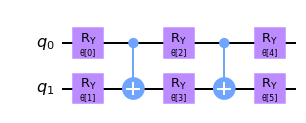

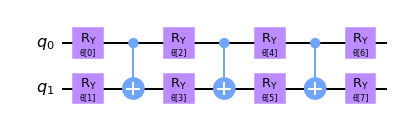

In [7]:
from qiskit.quantum_info import SparsePauliOp

psi1 = RealAmplitudes(num_qubits=2, reps=2)
psi2 = RealAmplitudes(num_qubits=2, reps=3)

H1 = SparsePauliOp.from_list([("II", 1), ("IZ", 2), ("XI", 3)])
H2 = SparsePauliOp.from_list([("IZ", 1)])
H3 = SparsePauliOp.from_list([("ZI", 1), ("ZZ", 1)])

display(psi1.decompose().draw())
display(psi2.decompose().draw())

In [8]:
from qiskit_ibm_runtime import Estimator

with Estimator(circuits=[psi1, psi2], observables=[H1, H2, H3], service=service, 
               options={ "backend": "ibmq_qasm_simulator" }
) as estimator:
    theta1 = [0, 1, 1, 2, 3, 5]
    theta2 = [0, 1, 1, 2, 3, 5, 8, 13]
    theta3 = [1, 2, 3, 4, 5, 6]

    # calculate [ <psi1(theta1)|H1|psi1(theta1)> ]
    psi1_H1_result = estimator(circuit_indices=[0], observable_indices=[0], parameter_values=[theta1])
    print(psi1_H1_result)

    # calculate [ <psi1(theta1)|H2|psi1(theta1)>, <psi1(theta1)|H3|psi1(theta1)> ]
    psi1_H23_result = estimator(circuit_indices=[0, 0], observable_indices=[1, 2], parameter_values=[theta1]*2)
    print(psi1_H23_result)

    # calculate [ <psi2(theta2)|H2|psi2(theta2)> ]
    psi2_H2_result = estimator([1], [1], [theta2])
    print(psi2_H2_result)

    # calculate [ <psi1(theta1)|H1|psi1(theta1)>, <psi1(theta3)|H1|psi1(theta3)> ]
    psi1_H1_result2 = estimator([0, 0], [0, 0], [theta1, theta3])
    print(psi1_H1_result2)

    # calculate [ <psi1(theta1)|H1|psi1(theta1)>, <psi2(theta2)|H2|psi2(theta2)>, <psi1(theta3)|H3|psi1(theta3)> ]
    psi12_H23_result = estimator([0, 1, 0], [0, 1, 2], [theta1, theta2, theta3])
    print(psi12_H23_result)

EstimatorResult(values=array([1.55664062]), metadata=[{'variance': 8.971965789794922, 'shots': 1024}])
EstimatorResult(values=array([-0.4921875 ,  0.09570312]), metadata=[{'variance': 0.75775146484375, 'shots': 1024}, {'variance': 1.9951896667480469, 'shots': 1024}])
EstimatorResult(values=array([0.18554688]), metadata=[{'variance': 0.9655723571777344, 'shots': 1024}])
EstimatorResult(values=array([1.53320312, 1.05859375]), metadata=[{'variance': 9.304027557373047, 'shots': 1024}, {'variance': 12.152267456054688, 'shots': 1024}])
EstimatorResult(values=array([ 1.53515625,  0.23828125, -1.09765625]), metadata=[{'variance': 9.339340209960938, 'shots': 1024}, {'variance': 0.9432220458984375, 'shots': 1024}, {'variance': 1.2371673583984375, 'shots': 1024}])
